This python script shows a basic implementation of calculating and plotting a confusion matrix after a multiclassification training with keras.
First basic libraries has to be included: 

In [26]:
import numpy as np
import matplotlib.pyplot as plt
import json
import os
import yaml

Load the training model from keras for a specified fold:

In [27]:
FOLD = 0

from keras.models import load_model
model = load_model(
    '/home/peter/Machine-Learning/fold{}_multiclass_model.h5'.format(FOLD))

Plot the imported model:

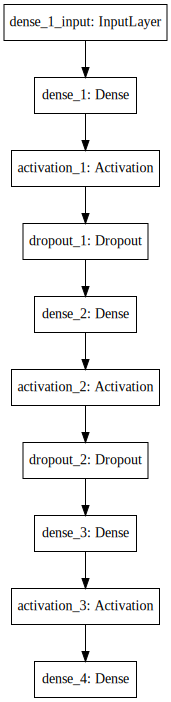

In [28]:
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot

SVG(model_to_dot(model).create(prog='dot', format='svg'))

Load the testing data created in the training step:

In [29]:
# load testing data
x_test = np.load(
    '/home/peter/Machine-Learning/arrays/x_test_fold{}.npy'.format(FOLD))
y_test = np.load(
    '/home/peter/Machine-Learning/arrays/y_test_fold{}.npy'.format(FOLD))

Apply the same transformations to testing data as to the training set:

In [30]:
# preprocessing
from sklearn import preprocessing
scaler = preprocessing.StandardScaler().fit(x_test)
x_test_scaled = scaler.transform(x_test)

Use the `predict(self, x, batch_size=32, verbose=0)` function to do predictions on the test sample with the trained model.

In [31]:
# predicted probabilities for the test set
Yp = model.predict(x_test_scaled, verbose=1)

945222/945222 [==============================] - 50s 52us/step


Convert prediction array `Yp` from one-hot encoding to label:

In [32]:
# to label
yp = np.argmax(Yp, axis=-1)
y_test = np.argmax(y_test, axis=-1)

Function for plotting normalized and unnormalized confusion matrices:

In [33]:
import itertools
from sklearn.metrics import confusion_matrix


def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Wistia):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [34]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, yp)
np.set_printoptions(precision=2)

Now you can plot the normalized and unnormalized confusions!

In [35]:
# Load config for classes
config = yaml.load(open(
    "/home/peter/Machine-Learning/training/configs/multiclass_MSSM_HWW_training.yaml", "r"))

Confusion matrix, without normalization
[[  5224    805    163    337    175   3239    996   4743   7036]
 [  2236   4961   5855   3759    460   1976  17060   2379  24547]
 [   654   3933  13150   2303    140    434  31976    538   7561]
 [   670     17     28    752    301     70    500   8031   3045]
 [  3596    568    213    271    211   2147   1248   3794   6783]
 [   133     67     20     67      5     53    212    163     97]
 [  1411    152     52    459     83    382    678   3795   1559]
 [  1255    561     44   1450    230   1126    433   2252   1841]
 [ 76878  86497   6088 191212  18821 122283  51727 125757  68494]]
Normalized confusion matrix
[[ 0.23  0.04  0.01  0.01  0.01  0.14  0.04  0.21  0.31]
 [ 0.04  0.08  0.09  0.06  0.01  0.03  0.27  0.04  0.39]
 [ 0.01  0.06  0.22  0.04  0.    0.01  0.53  0.01  0.12]
 [ 0.05  0.    0.    0.06  0.02  0.01  0.04  0.6   0.23]
 [ 0.19  0.03  0.01  0.01  0.01  0.11  0.07  0.2   0.36]
 [ 0.16  0.08  0.02  0.08  0.01  0.06  0.26  0.2   0

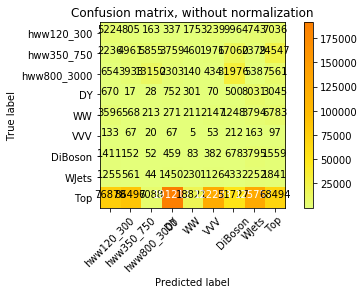

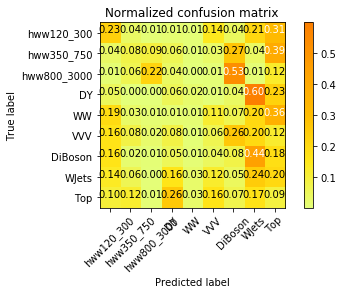

In [36]:
# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=config["classes"],
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=config["classes"], normalize=True,
                      title='Normalized confusion matrix')

plt.show()